# Project 3 - FYS-STK4155
## About the dataset

This notebook contains the code which produces the results for the Project 3 report in FYS-STK4155 regarding the dataset we have used.
The dataset used was retrieved from: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/data, 17.11.25.

*Fall 2025*

**Authors:** Martine Jenssen Pedersen, Sverre Manu Johansen & Kjersti Stangeland

In [1]:
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder


import matplotlib.style as mplstyle

mplstyle.use(["ggplot", "fast"])

sns.set_context("notebook", font_scale=1.3)
sns.set_style("whitegrid")

# For saving figures
figpath  = '/Users/kjesta/Desktop/Masteremner/FYS-STK4155/Project_3_FYSSTK/Figures'
sys.path.append(figpath)

%load_ext autoreload
%autoreload 2

In [2]:
path = '/Users/kjesta/Desktop/Masteremner/FYS-STK4155/Project_3_FYSSTK/kagglehub/datasets/nikhil7280/weather-type-classification/versions/1/weather_classification_data.csv'
df = pd.read_csv(path)

In [3]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


The dataset contains 13 200 rows of data, with 10 feature columns. Together, they yield 4 different classes of weather types.

In [4]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

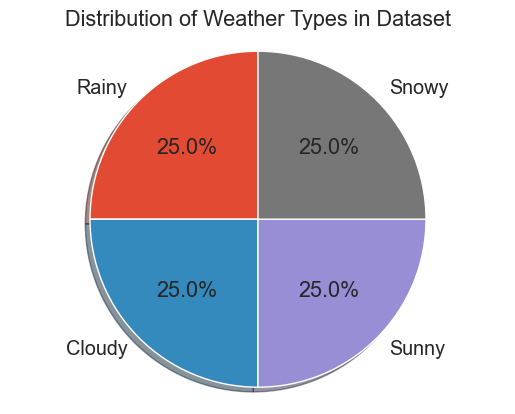

In [14]:
sizes = df['Weather Type'].value_counts()
labels = sizes.index

plt.pie(sizes, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Weather Types in Dataset')
plt.savefig(os.path.join(figpath, 'weather_type_distribution.pdf'), dpi=200)

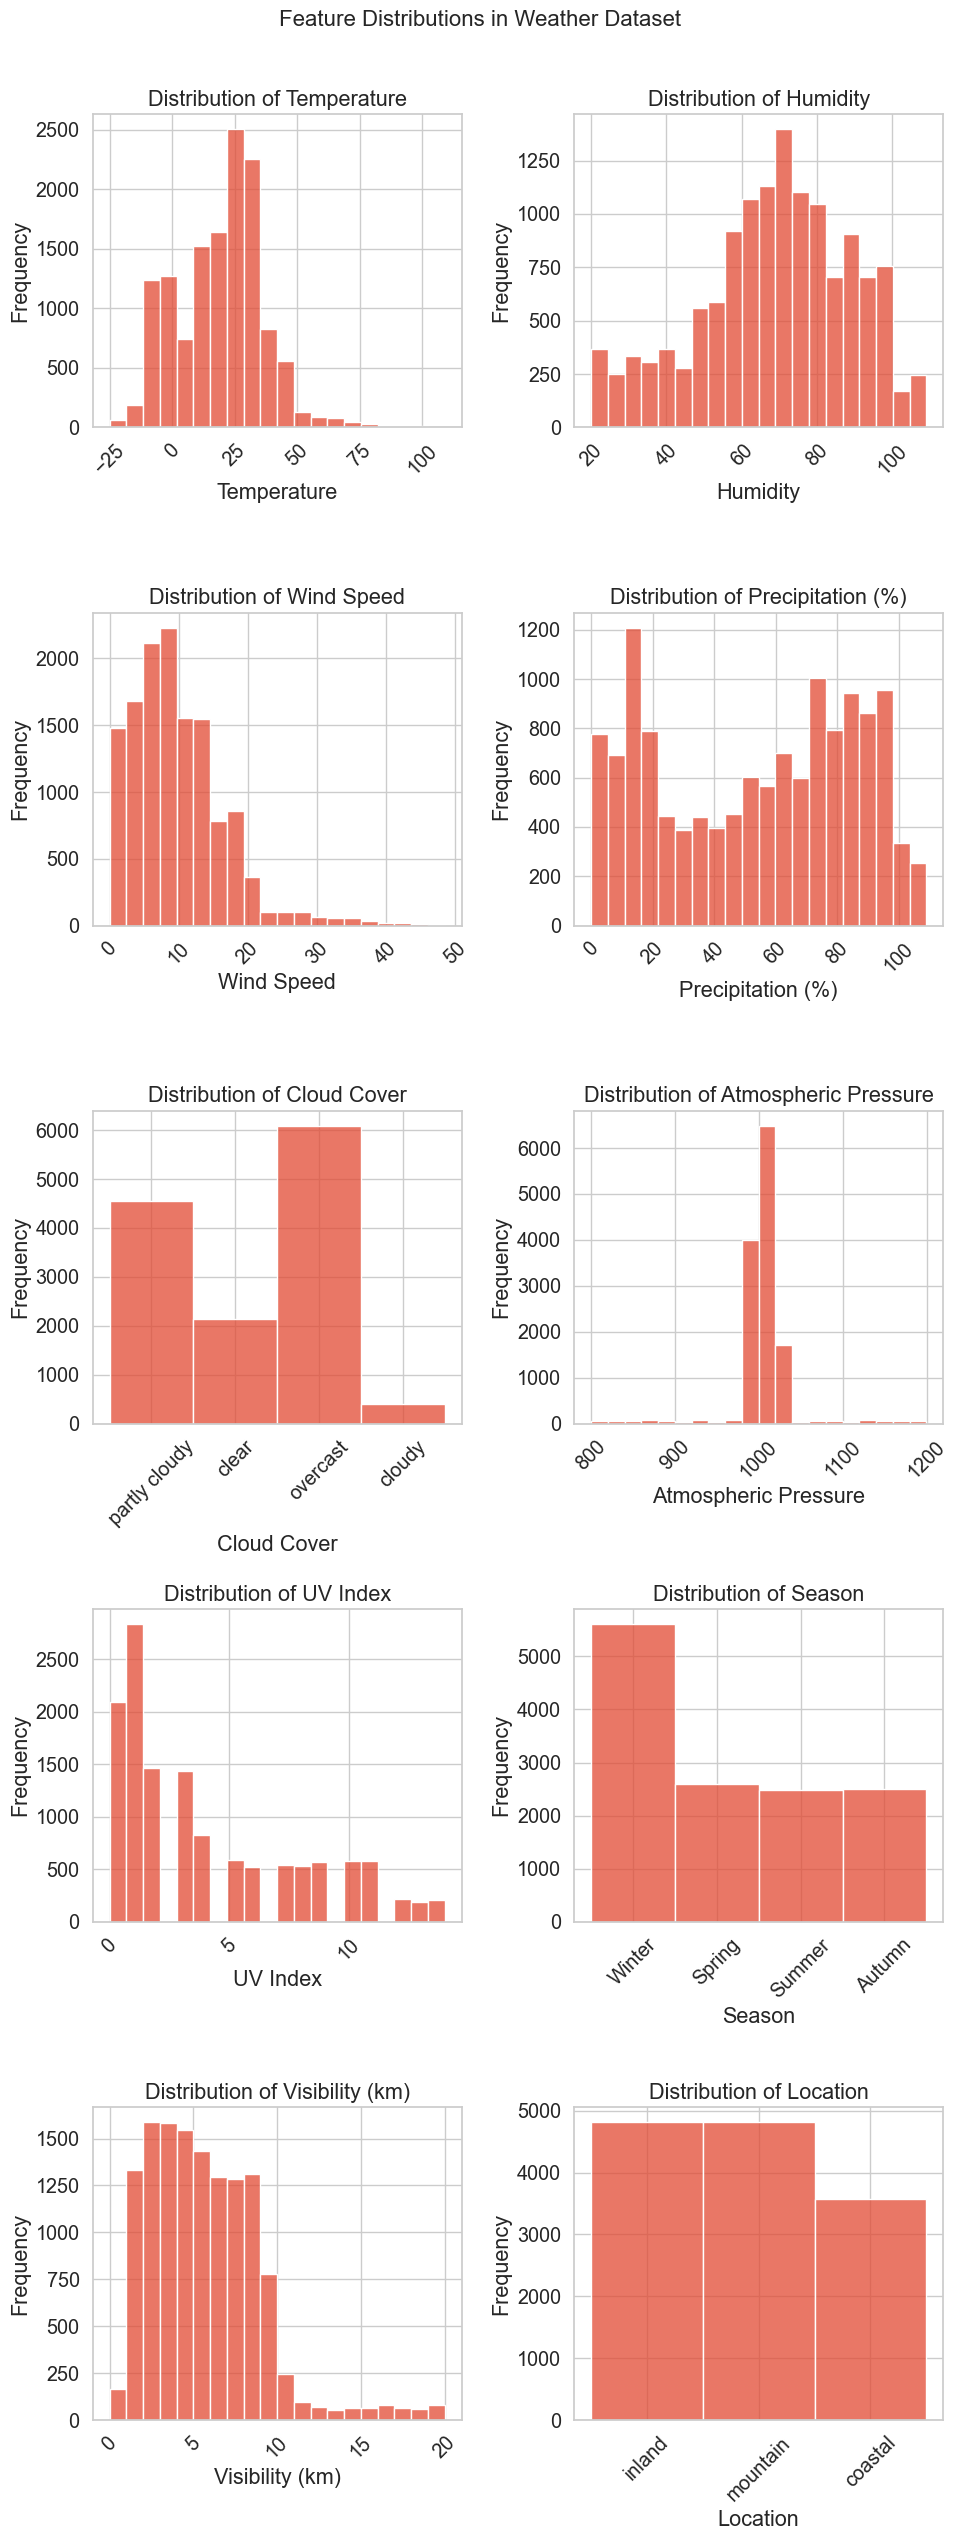

In [15]:
plt.rcParams.update({'font.size': 20})

cols = df.columns[:-1]  # exclude target column
n = len(cols)

fig, axes = plt.subplots(5, 2, figsize=(10, 25))
axes = axes.flatten()  # make indexing easier

for i, column in enumerate(cols):
    ax = axes[i]
    sns.histplot(df[column], kde=False, bins=20, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel('Frequency')

# Hide empty subplots if you have fewer than 10 columns
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
fig.suptitle('Feature Distributions in Weather Dataset', y=1.02, fontsize=16)
plt.savefig(os.path.join(figpath, 'weather_feature_distributions.pdf'), dpi=200)